# Load all necessary packages to run this script

In [1]:
import pandas as pd #package to modulate dataframes (aka tables)
import seaborn as sns #advanced package for data visualization
import matplotlib.pyplot as plt #basic package for data visualization
import numpy as np #package for numeric calculations
import itertools #funny package to do combinatorics and other stuff
from statannot import add_stat_annotation #package for statistical annotation

# Give all necessary information to run the script (read carefully the instructions!!!)

In [2]:
#THIS IS THE ONLY PART OF THE SCRIPT YOU MUST DO SOMETHING! PLEASE GIVE ALL THE NECESSARY INFORMATION BELOW.
#YOU CAN STILL CHANGE THE INFORMATION AND RERUN THE SCRIPT.



#PART 1: FILES AND DIRECTORIES
#GIVE THE PATHS TO THE INITIAL FILES (FILE1: GATING-STRATEGY, FILE2: CELL_COUNT TABLE; BOTH IN CSV FORMAT)
GATING = r"C:\Users\pasca\Documents\Working_dir\Table_BM_Trumpp.csv"
CELL_COUNTS = r"C:\Users\pasca\Documents\Working_dir\cell_counts.csv"

#DEFINE HERE YOUR OUTPUT-DIR (THE OUTPUT FILES WILL BE SAVED HERE)
OUTPUT_DIR = r"C:\Users\pasca\Documents\Working_dir"



#PART 2: DEFINE YOUR STARTING POPULATION (WHICH POPULATION IS THE CALCULATIONS BASED ON? 
#IN MOST OF THE CASES IT WILL BE THE "coi/db" POPULATION)
#REMARK: LEAVE AWAY THE "FREQ. OF PARENT" PART AND ADD NO SPACES! EXAMPLES: "coi", "coi/db", "coi/db/lin-"
start_pop = "coi/db/lin-"



#PART 3: GRAPHICAL COSMETICS
#DEFINE THE GROUP-ORDER FOR THE GRAPHS (ATTENTION: LEAVE AWAY THE "_1.fcs" PART)
order = ["B", "S"]

#DEFINE THE NAME OF THE COMPARTMENT/ORGAN ANALYZED
organ = "BM lin-"

#IF YOU GIVE A CELL_COUNTS TABLE, AT WHICH POWER ARE THE NUMBERS GIVEN
#E.G. WHEN YOU GAVE THE NUMBERS TIMES MILLIONS (X10^6), IT IS THE POWER OF 6
power = "6"



#PART 4: NAMING OF GROUPS
#THIS CODE CONCLUDES THE GROUP NAMES FROM THE SAMPLE NAMES. AN EXAMPLE:
    #SAMPLE NAME: B_1_001.fcs
    #GROUP NAME: B
#THIS MEANS THAT IN THIS CASE, THE PART "_1_001.fcs" WILL BE REMOVED FOR THE GROUP NAME.
#I DID NOT FIND A PROPER SOLUTION TO DO THIS AUTOMATICALLY, THEREFORE YOU MUST GIVE ME THE INFORMATION
#WHICH PART OF THE SAMPLE NAME HAS TO BE REMOVED (THIS DEPENDS ON YOUR NOMENCLATURE AND THE FACS-MACHINE)
part_to_remove = "_1_001.fcs"



#PART 5: STATISTICS
#DO YOU WANT TO ADD STATISTICS? YES OR NO.
stat_ind = "yes"

#IF YOU HAVE MORE THAN 2 GROUPS, DO YOU WANT TO USE A CONTROL GROUP FOR STATISTICAL COMPARISON?
single_comp = "no"

#IF YES, PLEASE GIVE THE NAME OF THE CONTROL GROUP (ATTENTION: LEAVE AWAY THE "_1.fcs" PART):
#REMARK: IN CASE YOU HAVE ONLY TWO GROUPS, IGNORE THIS VARIABLE
control_group = "BM_all"

#CHOOSE STATISTICS TEST (AVAILABLE ARE t-test_ind, t-test_welch, 
#t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal)
stat_test = "t-test_welch"



#PART 6: SAVING THE GRAPHICS
#CHOOSE THE DATATYPE
datatype = "png"

#CHOOSE THE SIZE (IN DPI)
size = 300

# Step 1: Import and modify the table received from Flojo (just run it)

In [3]:
#Step 1: import csv file with gating strategy
BM_gating = pd.read_csv(GATING, sep=';', index_col=0)

#Step 2: Define types of all columns as string
BM_gating = BM_gating.astype(str)

#Step 3: Modify the columns itself (remove the %, change the values to numeric types, 
#divide the numbers by 100)
for column in BM_gating:
    BM_gating[column] = BM_gating[column].str.split(" ", expand=True)[0]
    BM_gating[column] = BM_gating[column].apply(pd.to_numeric)
    BM_gating[column] = BM_gating[column]/100

#Step 4: Modify the column titles (remove the "Frequency of Parent" part, remove all commas and spaces)
coi = BM_gating.columns[0]
to_keep = coi.split(" ")[0]
BM_gating = BM_gating.rename(columns = lambda x : str(x)[:-(len(coi)-len(to_keep))])
BM_gating.columns = BM_gating.columns.str.replace(' ', '')
BM_gating.columns = BM_gating.columns.str.replace(',', '')
BM_gating.columns = BM_gating.columns.str.replace(':', '_')

#Step 5: Remove the mean and SD rows, remove the first two columns 
#(correspond to the gates for the cells of interest and the doublette-free gate)
BM_gating = BM_gating.drop(["Mean", "SD"])
coi = BM_gating.columns[0]
db = BM_gating.columns[1]
BM_gating = BM_gating.drop([coi, db], axis=1)

#Step 6: Show the final dataframe
BM_gating

,coi/db/lin-,coi/db/lin-/LSK,coi/db/lin-/LSK/Q1_CD48-CD150+,coi/db/lin-/LSK/Q1_CD48-CD150+/LT-HSC,coi/db/lin-/LSK/Q1_CD48-CD150+/Q1_CD34-CD135+,coi/db/lin-/LSK/Q1_CD48-CD150+/Q2_CD34+CD135+,coi/db/lin-/LSK/Q1_CD48-CD150+/ST-HSC,coi/db/lin-/LSK/Q2_CD48+CD150+,coi/db/lin-/LSK/Q2_CD48+CD150+/MPP1,coi/db/lin-/LSK/Q2_CD48+CD150+/Q1_CD34-CD135+,coi/db/lin-/LSK/Q2_CD48+CD150+/Q2_CD34+CD135+,coi/db/lin-/LSK/Q2_CD48+CD150+/Q4_CD34-CD135-,coi/db/lin-/LSK/Q3_CD48+CD150-,coi/db/lin-/LSK/Q3_CD48+CD150-/MPP2,coi/db/lin-/LSK/Q3_CD48+CD150-/MPP3,coi/db/lin-/LSK/Q3_CD48+CD150-/Q1_CD34-CD135+,coi/db/lin-/LSK/Q3_CD48+CD150-/Q4_CD34-CD135-,coi/db/lin-/LSK/Q4_CD48-CD150-
B_1_001.fcs,0.493,0.0111,0.1130,0.276,0.0,0.000,0.724,0.0662,0.942,0.0097,0.0000,0.0485,0.742,0.446,0.510,0.0268,0.0169,0.0784
B_2_002.fcs,0.601,0.0103,0.1210,0.355,0.0,0.000,0.645,0.0718,0.831,0.0081,0.0242,0.1370,0.742,0.336,0.572,0.0601,0.0316,0.0652
B_3_003.fcs,0.611,0.0072,0.1400,0.309,0.0,0.000,0.691,0.0864,0.904,0.0080,0.0159,0.0717,0.680,0.423,0.499,0.0405,0.0374,0.0929
B_4_004.fcs,0.462,0.0106,0.1050,0.262,0.0,0.000,0.738,0.1040,0.930,0.0000,0.0083,0.0620,0.738,0.566,0.389,0.0122,0.0332,0.0525
B_5_005.fcs,0.609,0.0084,0.1090,0.351,0.0,0.000,0.649,0.0489,0.848,0.0138,0.0552,0.0828,0.787,0.273,0.587,0.1110,0.0291,0.0560
S_1_015.fcs,0.688,0.0088,0.1360,0.323,0.0,0.000,0.677,0.1060,0.946,0.0000,0.0072,0.0471,0.678,0.499,0.439,0.0304,0.0321,0.0803
S_2_016.fcs,0.682,0.0048,0.1830,0.257,0.0,0.000,0.743,0.1100,0.950,0.0000,0.0100,0.0398,0.607,0.455,0.484,0.0243,0.0361,0.1010
S_3_017.fcs,0.604,0.0078,0.0683,0.417,0.0,0.006,0.577,0.0959,0.852,0.0000,0.0212,0.1270,0.790,0.404,0.491,0.0550,0.0494,0.0459
S_4_018.fcs,0.719,0.0040,0.1590,0.477,0.0,0.000,0.523,0.0882,0.903,0.0000,0.0000,0.0974,0.643,0.536,0.342,0.0578,0.0641,0.1100
S_5_019.fcs,0.712,0.0038,0.1200,0.450,0.0,0.000,0.550,0.0714,0.832,0.0093,0.0093,0.1500,0.720,0.312,0.480,0.1560,0.0528,0.0881


# Step 2: Calculate the results in % of total cells (for each of the gated populations individually)

In [4]:
#Step 1: Prepare the results dataframe

results = pd.DataFrame()
colname = BM_gating.columns[0]
results[start_pop] = BM_gating[colname]
results[start_pop] = 100

results

,coi/db/lin-
B_1_001.fcs,100
B_2_002.fcs,100
B_3_003.fcs,100
B_4_004.fcs,100
B_5_005.fcs,100
S_1_015.fcs,100
S_2_016.fcs,100
S_3_017.fcs,100
S_4_018.fcs,100
S_5_019.fcs,100


In [6]:
#Calculate the results in percentage using a for-loop

#Step 2: Create a string (test) and an empty list for further manipulation
substring = start_pop
stringlist = []
count = 0

#Step 3: Iterate through the Percentage-Table (column by column)
for column in BM_gating:
    
    if substring in column: #check if my set substring is contained in the column name
        if column == start_pop:
            stringlist.append(column)   
        else:
            results[column] = results[substring] * BM_gating[column] #if substring is part of column name, do the calculations
            substring = str(column) #reset the variable "substring" with the column name
            stringlist.append(column) #add the column name as an element to the stringlist
            #print(stringlist)
            #count = count+1
            #print(count)

    else: #if my column name is not contained in the previous column, the code continues here
        working_list = [] #create another empty list
        for element in stringlist: #iterate over the stringlist (contains the names of all previous columns)
            if element in column: #if one of the previous columns is contained in the current column, the name will be added to the working_list
                working_list.append(element)
        max_value = max(working_list, key=len) #create the variable "max_value", which contains the longest element form the working_list
        results[column] = results[max_value] * BM_gating[column] #use the max_value column name to calculate the value of the new column
        substring = str(column)
        stringlist.append(column)
        #print(stringlist)
        #count = count+1
        #print(count)

filepath = OUTPUT_DIR + "\\results_percentage.csv"
results.to_csv(filepath)

results

,coi/db/lin-,coi/db/lin-/LSK,coi/db/lin-/LSK/Q1_CD48-CD150+,coi/db/lin-/LSK/Q1_CD48-CD150+/LT-HSC,coi/db/lin-/LSK/Q1_CD48-CD150+/Q1_CD34-CD135+,coi/db/lin-/LSK/Q1_CD48-CD150+/Q2_CD34+CD135+,coi/db/lin-/LSK/Q1_CD48-CD150+/ST-HSC,coi/db/lin-/LSK/Q2_CD48+CD150+,coi/db/lin-/LSK/Q2_CD48+CD150+/MPP1,coi/db/lin-/LSK/Q2_CD48+CD150+/Q1_CD34-CD135+,coi/db/lin-/LSK/Q2_CD48+CD150+/Q2_CD34+CD135+,coi/db/lin-/LSK/Q2_CD48+CD150+/Q4_CD34-CD135-,coi/db/lin-/LSK/Q3_CD48+CD150-,coi/db/lin-/LSK/Q3_CD48+CD150-/MPP2,coi/db/lin-/LSK/Q3_CD48+CD150-/MPP3,coi/db/lin-/LSK/Q3_CD48+CD150-/Q1_CD34-CD135+,coi/db/lin-/LSK/Q3_CD48+CD150-/Q4_CD34-CD135-,coi/db/lin-/LSK/Q4_CD48-CD150-
B_1_001.fcs,100,1.11,0.125430,0.034619,0.0,0.00000,0.090811,0.073482,0.069220,0.000713,0.000000,0.003564,0.82362,0.367335,0.420046,0.022073,0.013919,0.087024
B_2_002.fcs,100,1.03,0.124630,0.044244,0.0,0.00000,0.080386,0.073954,0.061456,0.000599,0.001790,0.010132,0.76426,0.256791,0.437157,0.045932,0.024151,0.067156
B_3_003.fcs,100,0.72,0.100800,0.031147,0.0,0.00000,0.069653,0.062208,0.056236,0.000498,0.000989,0.004460,0.48960,0.207101,0.244310,0.019829,0.018311,0.066888
B_4_004.fcs,100,1.06,0.111300,0.029161,0.0,0.00000,0.082139,0.110240,0.102523,0.000000,0.000915,0.006835,0.78228,0.442770,0.304307,0.009544,0.025972,0.055650
B_5_005.fcs,100,0.84,0.091560,0.032138,0.0,0.00000,0.059422,0.041076,0.034832,0.000567,0.002267,0.003401,0.66108,0.180475,0.388054,0.073380,0.019237,0.047040
S_1_015.fcs,100,0.88,0.119680,0.038657,0.0,0.00000,0.081023,0.093280,0.088243,0.000000,0.000672,0.004393,0.59664,0.297723,0.261925,0.018138,0.019152,0.070664
S_2_016.fcs,100,0.48,0.087840,0.022575,0.0,0.00000,0.065265,0.052800,0.050160,0.000000,0.000528,0.002101,0.29136,0.132569,0.141018,0.007080,0.010518,0.048480
S_3_017.fcs,100,0.78,0.053274,0.022215,0.0,0.00032,0.030739,0.074802,0.063731,0.000000,0.001586,0.009500,0.61620,0.248945,0.302554,0.033891,0.030440,0.035802
S_4_018.fcs,100,0.40,0.063600,0.030337,0.0,0.00000,0.033263,0.035280,0.031858,0.000000,0.000000,0.003436,0.25720,0.137859,0.087962,0.014866,0.016487,0.044000
S_5_019.fcs,100,0.38,0.045600,0.020520,0.0,0.00000,0.025080,0.027132,0.022574,0.000252,0.000252,0.004070,0.27360,0.085363,0.131328,0.042682,0.014446,0.033478


# Step 3: Visualize the percentages of total cell population

# Attetion with Pre-Step 1! I still didn't find a proper solution here, double-check the result of the "group" column if the group names are correct!

In [7]:
#Pre-Step 1: Add a group column to the results dataframe
results['group'] = results.index
results["group"] = results["group"].str[:-len(part_to_remove)]
results = results.drop(db, axis=1, errors='ignore')

results

,coi/db/lin-,coi/db/lin-/LSK,coi/db/lin-/LSK/Q1_CD48-CD150+,coi/db/lin-/LSK/Q1_CD48-CD150+/LT-HSC,coi/db/lin-/LSK/Q1_CD48-CD150+/Q1_CD34-CD135+,coi/db/lin-/LSK/Q1_CD48-CD150+/Q2_CD34+CD135+,coi/db/lin-/LSK/Q1_CD48-CD150+/ST-HSC,coi/db/lin-/LSK/Q2_CD48+CD150+,coi/db/lin-/LSK/Q2_CD48+CD150+/MPP1,coi/db/lin-/LSK/Q2_CD48+CD150+/Q1_CD34-CD135+,coi/db/lin-/LSK/Q2_CD48+CD150+/Q2_CD34+CD135+,coi/db/lin-/LSK/Q2_CD48+CD150+/Q4_CD34-CD135-,coi/db/lin-/LSK/Q3_CD48+CD150-,coi/db/lin-/LSK/Q3_CD48+CD150-/MPP2,coi/db/lin-/LSK/Q3_CD48+CD150-/MPP3,coi/db/lin-/LSK/Q3_CD48+CD150-/Q1_CD34-CD135+,coi/db/lin-/LSK/Q3_CD48+CD150-/Q4_CD34-CD135-,coi/db/lin-/LSK/Q4_CD48-CD150-,group
B_1_001.fcs,100,1.11,0.125430,0.034619,0.0,0.00000,0.090811,0.073482,0.069220,0.000713,0.000000,0.003564,0.82362,0.367335,0.420046,0.022073,0.013919,0.087024,B
B_2_002.fcs,100,1.03,0.124630,0.044244,0.0,0.00000,0.080386,0.073954,0.061456,0.000599,0.001790,0.010132,0.76426,0.256791,0.437157,0.045932,0.024151,0.067156,B
B_3_003.fcs,100,0.72,0.100800,0.031147,0.0,0.00000,0.069653,0.062208,0.056236,0.000498,0.000989,0.004460,0.48960,0.207101,0.244310,0.019829,0.018311,0.066888,B
B_4_004.fcs,100,1.06,0.111300,0.029161,0.0,0.00000,0.082139,0.110240,0.102523,0.000000,0.000915,0.006835,0.78228,0.442770,0.304307,0.009544,0.025972,0.055650,B
B_5_005.fcs,100,0.84,0.091560,0.032138,0.0,0.00000,0.059422,0.041076,0.034832,0.000567,0.002267,0.003401,0.66108,0.180475,0.388054,0.073380,0.019237,0.047040,B
S_1_015.fcs,100,0.88,0.119680,0.038657,0.0,0.00000,0.081023,0.093280,0.088243,0.000000,0.000672,0.004393,0.59664,0.297723,0.261925,0.018138,0.019152,0.070664,S
S_2_016.fcs,100,0.48,0.087840,0.022575,0.0,0.00000,0.065265,0.052800,0.050160,0.000000,0.000528,0.002101,0.29136,0.132569,0.141018,0.007080,0.010518,0.048480,S
S_3_017.fcs,100,0.78,0.053274,0.022215,0.0,0.00032,0.030739,0.074802,0.063731,0.000000,0.001586,0.009500,0.61620,0.248945,0.302554,0.033891,0.030440,0.035802,S
S_4_018.fcs,100,0.40,0.063600,0.030337,0.0,0.00000,0.033263,0.035280,0.031858,0.000000,0.000000,0.003436,0.25720,0.137859,0.087962,0.014866,0.016487,0.044000,S
S_5_019.fcs,100,0.38,0.045600,0.020520,0.0,0.00000,0.025080,0.027132,0.022574,0.000252,0.000252,0.004070,0.27360,0.085363,0.131328,0.042682,0.014446,0.033478,S


In [9]:
#Pre-Step 2: Get the necessary group information for the statistical analysis
pairs = results["group"].tolist()
pairs = list(set(pairs))
n_pairs = len(pairs)
tuple_comp = []

if stat_ind == "yes": 
    if n_pairs <= 2:
        tuple_comp = [tuple(pairs)]
    elif single_comp == "yes":
        for pair in itertools.combinations(pairs,2):
            tuple_comp.append(pair)
        tuple_comp = [item for item in tuples if control_group in item]
    else:
        for pair in itertools.combinations(pairs,2):
            tuple_comp.append(pair)

print(tuple_comp)

[('B', 'S')]


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B v.s. S: Welch's t-test independent samples with Bonferroni correction, P_val=nan stat=nan
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B v.s. S: Welch's t-test independent samples with Bonferroni correction, P_val=2.202e-02 stat=2.903e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B v.s. S: Welch's t-test independent samples with Bonferroni correction, P_val=5.097e-02 stat=2.450e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B v.s. S: Welch's t-test independent samples

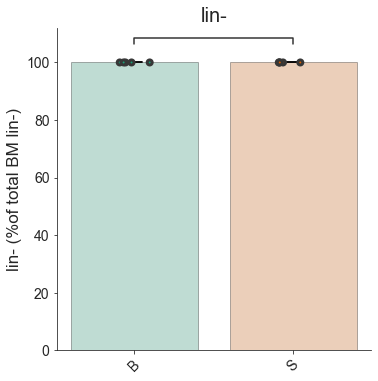

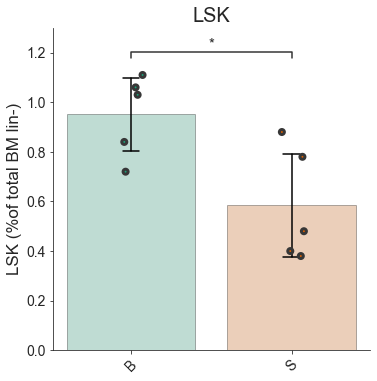

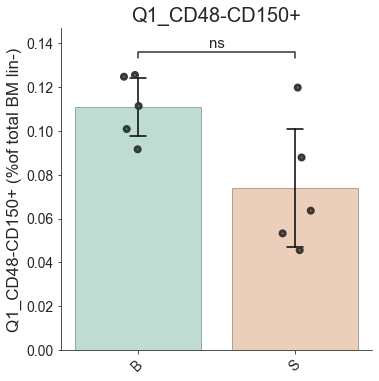

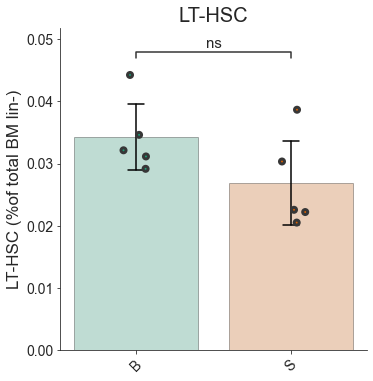

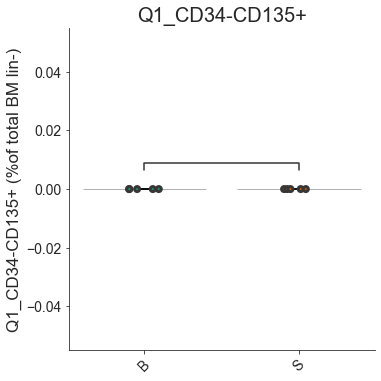

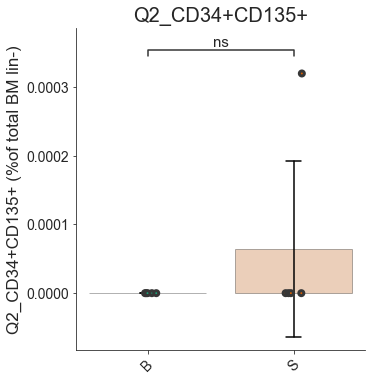

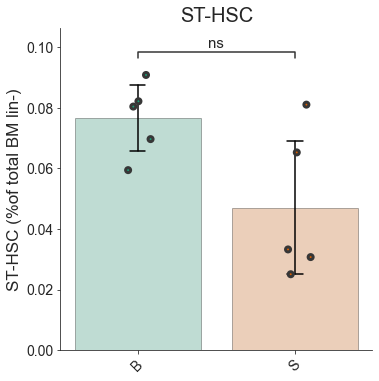

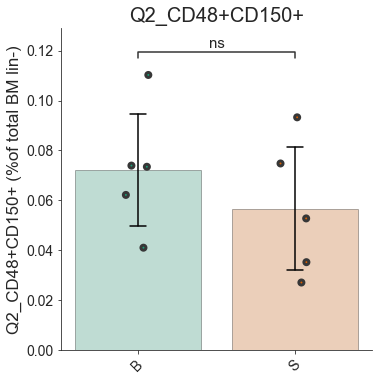

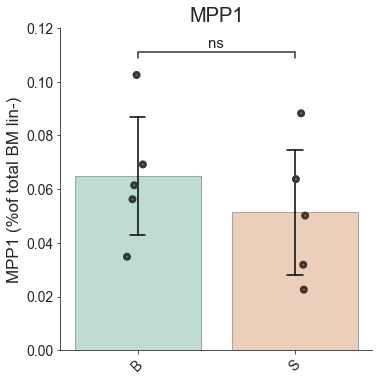

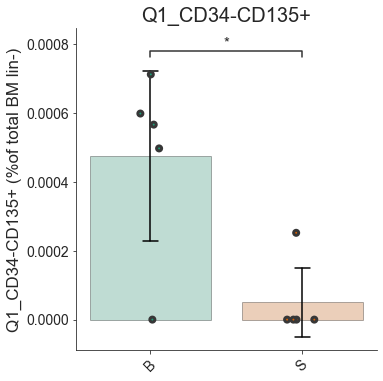

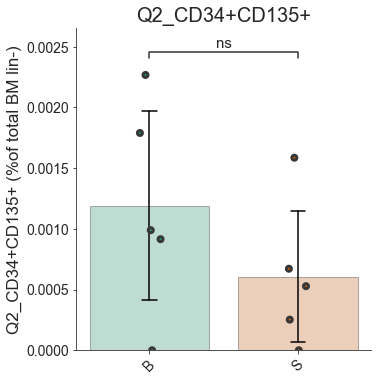

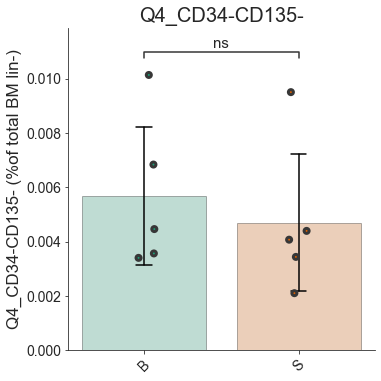

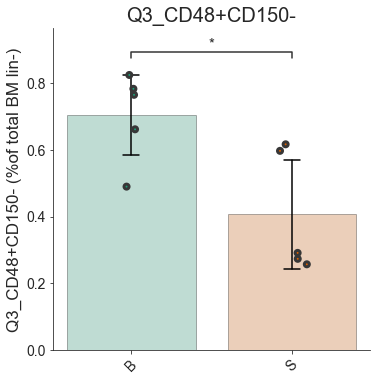

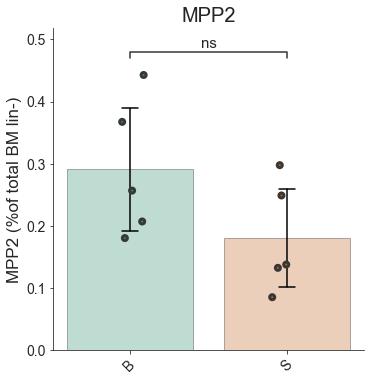

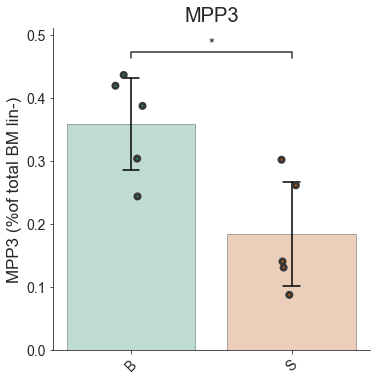

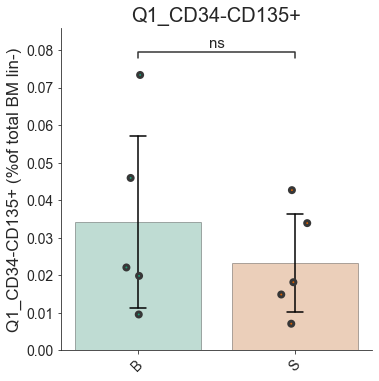

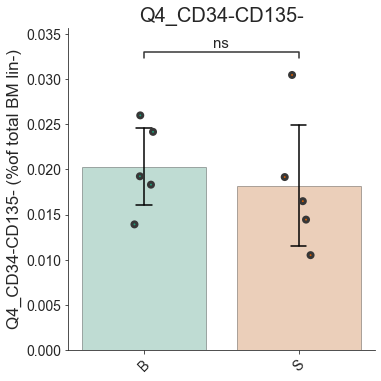

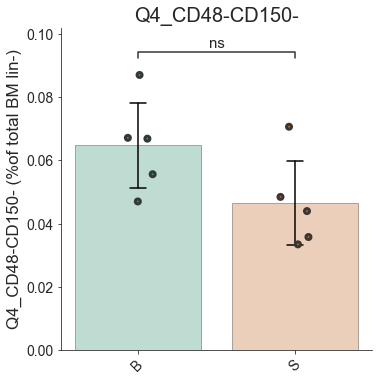

In [10]:
#Step 1: Set necessary settings for Seaborn
split = "/"
sns.set_style("ticks")
sns.set_palette("Dark2")

#Step 2: Visualize the data column by column using a for-loop
for column in results:
    if column != str("group"):
        ax = sns.catplot(kind="bar", 
                         data=results, 
                         y=column, 
                         x="group", 
                         ci="sd", 
                         edgecolor="black", 
                         errcolor="black", 
                         errwidth=1.5, 
                         capsize = 0.1, 
                         alpha=0.3, 
                         order = order)
        ax = sns.stripplot(x="group", 
                           y=column, 
                           data=results, 
                           dodge=True, 
                           alpha=1,
                           linewidth=3, 
                           order = order)
        plt.xlabel(None)
        plt.ylabel((column.split(split)[-1] + " (%of total " + organ + ")"), fontsize = 17)
        plt.title(column.split(split)[-1], fontsize=20)
        plt.xticks(rotation=45)
        plt.tick_params(axis='both', which='major', labelsize=14)
        
        if stat_ind == "yes":   
            add_stat_annotation(ax, 
                                data=results, 
                                x="group", 
                                y=column, 
                                order=order,
                                box_pairs=tuple_comp,
                                test=stat_test, 
                                text_format='star', 
                                loc='inside', 
                                verbose=2, fontsize=15)
        
        plt.savefig(OUTPUT_DIR + "\\" + column.split(split)[-1] + "_percentage_of_tot" + "." + datatype, dpi=size, bbox_inches="tight")

# Step 4: Calculate the absolute counts

In [68]:
#Step 1: Import csv file with cell counts and modify it
count_table = pd.read_csv(CELL_COUNTS, sep=';', index_col=0)
count_table = count_table.rename(columns={count_table.columns[0]: start_pop})
count_table = results.merge(count_table, suffixes=("_results", "_count"), left_index=True, right_index=True)
count_table = count_table[["coi/db/lin-_count"]]
count_table = count_table.rename(columns = lambda x : str(x)[:-6])

count_table

,coi/db/lin-
B_1_001.fcs,2.3664
B_2_002.fcs,4.2070
B_3_003.fcs,5.4990
B_4_004.fcs,3.0492
B_5_005.fcs,5.1765
S_1_015.fcs,3.5088
S_2_016.fcs,5.7288
S_3_017.fcs,3.7448
S_4_018.fcs,5.5363
S_5_019.fcs,5.4112


In [69]:
#Calculate the absolute cell counts using a for-loop

#Step 2: Create a string (test) and an empty list for further manipulation
substring = start_pop
stringlist = []
count = 0

#Step 3: Iterate through the Percentage-Table (column by column)
for column in BM_gating:
    
    if substring in column: #check if my set substring is contained in the column name
        if column == start_pop:
            stringlist.append(column)   
        else:
            count_table[column] = count_table[substring] * BM_gating[column] #if substring is part of column name, do the calculations
            substring = str(column) #reset the variable "substring" with the column name
            stringlist.append(column) #add the column name as an element to the stringlist
            #print(stringlist)
            #count = count+1
            #print(count)

    else: #if my column name is not contained in the previous column, the code continues here
        working_list = [] #create another empty list
        for element in stringlist: #iterate over the stringlist (contains the names of all previous columns)
            if element in column: #if one of the previous columns is contained in the current column, the name will be added to the working_list
                working_list.append(element)
        max_value = max(working_list, key=len) #create the variable "max_value", which contains the longest element form the working_list
        count_table[column] = count_table[max_value] * BM_gating[column] #use the max_value column name to calculate the value of the new column
        substring = str(column)
        stringlist.append(column)
        #print(stringlist)
        #count = count+1
        #print(count)

filepath = OUTPUT_DIR + "\\results_absolute.csv"
count_table.to_csv(filepath)

count_table

,coi/db/lin-,coi/db/lin-/LSK,coi/db/lin-/LSK/Q1_CD48-CD150+,coi/db/lin-/LSK/Q1_CD48-CD150+/LT-HSC,coi/db/lin-/LSK/Q1_CD48-CD150+/Q1_CD34-CD135+,coi/db/lin-/LSK/Q1_CD48-CD150+/Q2_CD34+CD135+,coi/db/lin-/LSK/Q1_CD48-CD150+/ST-HSC,coi/db/lin-/LSK/Q2_CD48+CD150+,coi/db/lin-/LSK/Q2_CD48+CD150+/MPP1,coi/db/lin-/LSK/Q2_CD48+CD150+/Q1_CD34-CD135+,coi/db/lin-/LSK/Q2_CD48+CD150+/Q2_CD34+CD135+,coi/db/lin-/LSK/Q2_CD48+CD150+/Q4_CD34-CD135-,coi/db/lin-/LSK/Q3_CD48+CD150-,coi/db/lin-/LSK/Q3_CD48+CD150-/MPP2,coi/db/lin-/LSK/Q3_CD48+CD150-/MPP3,coi/db/lin-/LSK/Q3_CD48+CD150-/Q1_CD34-CD135+,coi/db/lin-/LSK/Q3_CD48+CD150-/Q4_CD34-CD135-,coi/db/lin-/LSK/Q4_CD48-CD150-
B_1_001.fcs,2.3664,0.026267,0.002968,0.000819,0.0,0.000000,0.002149,0.001739,0.001638,0.000017,0.000000,0.000084,0.019490,0.008693,0.009940,0.000522,0.000329,0.002059
B_2_002.fcs,4.2070,0.043332,0.005243,0.001861,0.0,0.000000,0.003382,0.003111,0.002585,0.000025,0.000075,0.000426,0.032152,0.010803,0.018391,0.001932,0.001016,0.002825
B_3_003.fcs,5.4990,0.039593,0.005543,0.001713,0.0,0.000000,0.003830,0.003421,0.003092,0.000027,0.000054,0.000245,0.026923,0.011388,0.013435,0.001090,0.001007,0.003678
B_4_004.fcs,3.0492,0.032322,0.003394,0.000889,0.0,0.000000,0.002505,0.003361,0.003126,0.000000,0.000028,0.000208,0.023853,0.013501,0.009279,0.000291,0.000792,0.001697
B_5_005.fcs,5.1765,0.043483,0.004740,0.001664,0.0,0.000000,0.003076,0.002126,0.001803,0.000029,0.000117,0.000176,0.034221,0.009342,0.020088,0.003799,0.000996,0.002435
S_1_015.fcs,3.5088,0.030877,0.004199,0.001356,0.0,0.000000,0.002843,0.003273,0.003096,0.000000,0.000024,0.000154,0.020935,0.010447,0.009190,0.000636,0.000672,0.002479
S_2_016.fcs,5.7288,0.027498,0.005032,0.001293,0.0,0.000000,0.003739,0.003025,0.002874,0.000000,0.000030,0.000120,0.016691,0.007595,0.008079,0.000406,0.000603,0.002777
S_3_017.fcs,3.7448,0.029209,0.001995,0.000832,0.0,0.000012,0.001151,0.002801,0.002387,0.000000,0.000059,0.000356,0.023075,0.009322,0.011330,0.001269,0.001140,0.001341
S_4_018.fcs,5.5363,0.022145,0.003521,0.001680,0.0,0.000000,0.001842,0.001953,0.001764,0.000000,0.000000,0.000190,0.014239,0.007632,0.004870,0.000823,0.000913,0.002436
S_5_019.fcs,5.4112,0.020563,0.002468,0.001110,0.0,0.000000,0.001357,0.001468,0.001222,0.000014,0.000014,0.000220,0.014805,0.004619,0.007106,0.002310,0.000782,0.001812


# Step 5: Visualize the absolute counts

# Attetion with Pre-Step 1! I still didn't find a proper solution here, double-check the result of the "group" column if the group names are correct!

In [70]:
#Pre-Step 1: Add a group column to the count_table dataframe
count_table['group'] = count_table.index
count_table["group"] = count_table["group"].str[:-len(part_to_remove)]
count_table = count_table.drop(db, axis=1, errors='ignore')

count_table

,coi/db/lin-,coi/db/lin-/LSK,coi/db/lin-/LSK/Q1_CD48-CD150+,coi/db/lin-/LSK/Q1_CD48-CD150+/LT-HSC,coi/db/lin-/LSK/Q1_CD48-CD150+/Q1_CD34-CD135+,coi/db/lin-/LSK/Q1_CD48-CD150+/Q2_CD34+CD135+,coi/db/lin-/LSK/Q1_CD48-CD150+/ST-HSC,coi/db/lin-/LSK/Q2_CD48+CD150+,coi/db/lin-/LSK/Q2_CD48+CD150+/MPP1,coi/db/lin-/LSK/Q2_CD48+CD150+/Q1_CD34-CD135+,coi/db/lin-/LSK/Q2_CD48+CD150+/Q2_CD34+CD135+,coi/db/lin-/LSK/Q2_CD48+CD150+/Q4_CD34-CD135-,coi/db/lin-/LSK/Q3_CD48+CD150-,coi/db/lin-/LSK/Q3_CD48+CD150-/MPP2,coi/db/lin-/LSK/Q3_CD48+CD150-/MPP3,coi/db/lin-/LSK/Q3_CD48+CD150-/Q1_CD34-CD135+,coi/db/lin-/LSK/Q3_CD48+CD150-/Q4_CD34-CD135-,coi/db/lin-/LSK/Q4_CD48-CD150-,group
B_1_001.fcs,2.3664,0.026267,0.002968,0.000819,0.0,0.000000,0.002149,0.001739,0.001638,0.000017,0.000000,0.000084,0.019490,0.008693,0.009940,0.000522,0.000329,0.002059,B
B_2_002.fcs,4.2070,0.043332,0.005243,0.001861,0.0,0.000000,0.003382,0.003111,0.002585,0.000025,0.000075,0.000426,0.032152,0.010803,0.018391,0.001932,0.001016,0.002825,B
B_3_003.fcs,5.4990,0.039593,0.005543,0.001713,0.0,0.000000,0.003830,0.003421,0.003092,0.000027,0.000054,0.000245,0.026923,0.011388,0.013435,0.001090,0.001007,0.003678,B
B_4_004.fcs,3.0492,0.032322,0.003394,0.000889,0.0,0.000000,0.002505,0.003361,0.003126,0.000000,0.000028,0.000208,0.023853,0.013501,0.009279,0.000291,0.000792,0.001697,B
B_5_005.fcs,5.1765,0.043483,0.004740,0.001664,0.0,0.000000,0.003076,0.002126,0.001803,0.000029,0.000117,0.000176,0.034221,0.009342,0.020088,0.003799,0.000996,0.002435,B
S_1_015.fcs,3.5088,0.030877,0.004199,0.001356,0.0,0.000000,0.002843,0.003273,0.003096,0.000000,0.000024,0.000154,0.020935,0.010447,0.009190,0.000636,0.000672,0.002479,S
S_2_016.fcs,5.7288,0.027498,0.005032,0.001293,0.0,0.000000,0.003739,0.003025,0.002874,0.000000,0.000030,0.000120,0.016691,0.007595,0.008079,0.000406,0.000603,0.002777,S
S_3_017.fcs,3.7448,0.029209,0.001995,0.000832,0.0,0.000012,0.001151,0.002801,0.002387,0.000000,0.000059,0.000356,0.023075,0.009322,0.011330,0.001269,0.001140,0.001341,S
S_4_018.fcs,5.5363,0.022145,0.003521,0.001680,0.0,0.000000,0.001842,0.001953,0.001764,0.000000,0.000000,0.000190,0.014239,0.007632,0.004870,0.000823,0.000913,0.002436,S
S_5_019.fcs,5.4112,0.020563,0.002468,0.001110,0.0,0.000000,0.001357,0.001468,0.001222,0.000014,0.000014,0.000220,0.014805,0.004619,0.007106,0.002310,0.000782,0.001812,S


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B v.s. S: Welch's t-test independent samples with Bonferroni correction, P_val=3.731e-01 stat=-9.462e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B v.s. S: Welch's t-test independent samples with Bonferroni correction, P_val=2.872e-02 stat=2.794e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B v.s. S: Welch's t-test independent samples with Bonferroni correction, P_val=2.501e-01 stat=1.241e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B v.s. S: Welch's t-test indepe

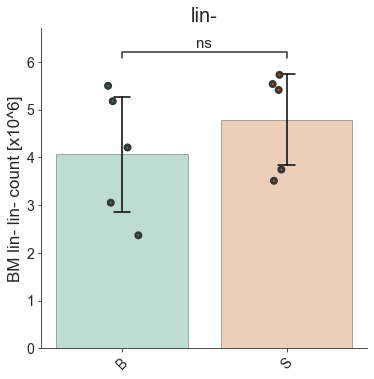

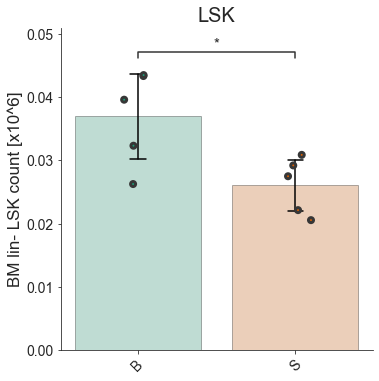

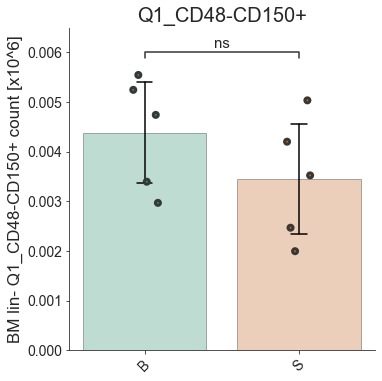

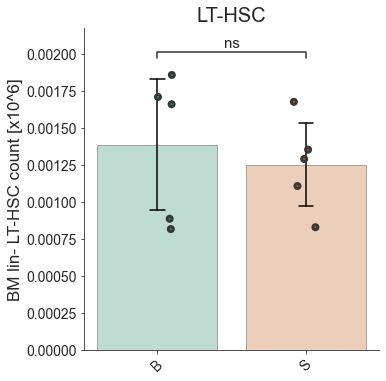

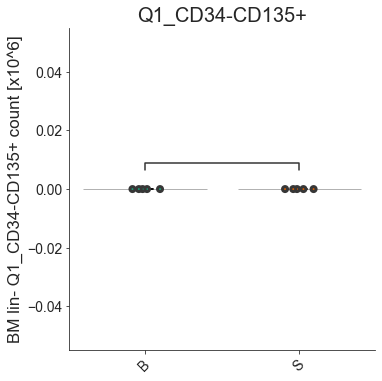

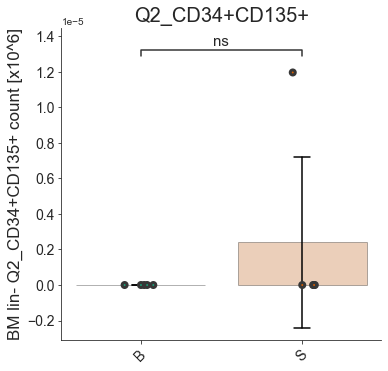

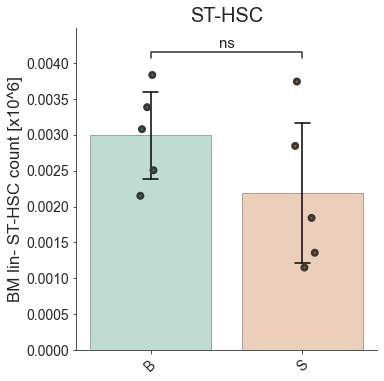

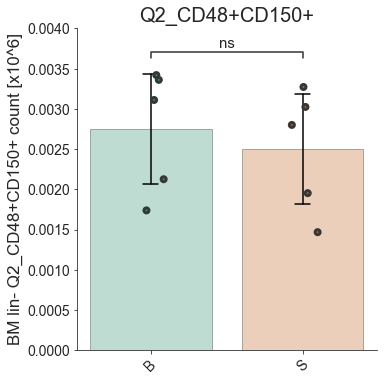

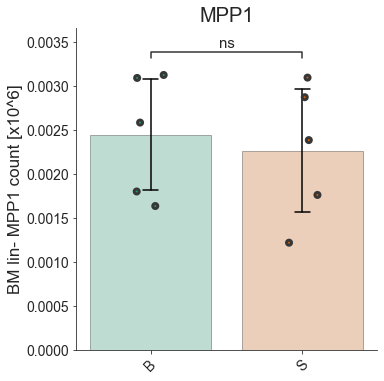

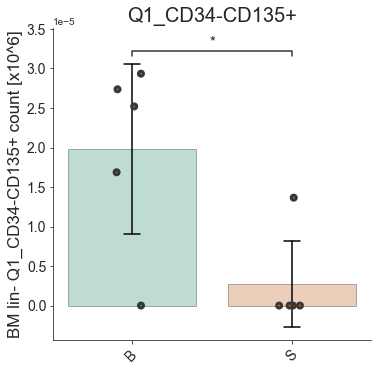

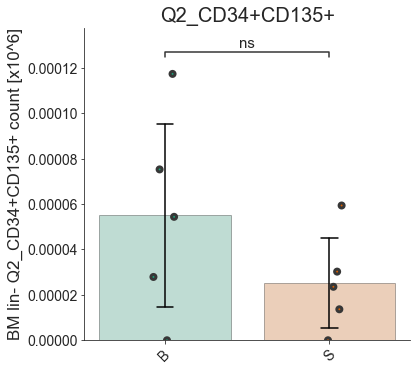

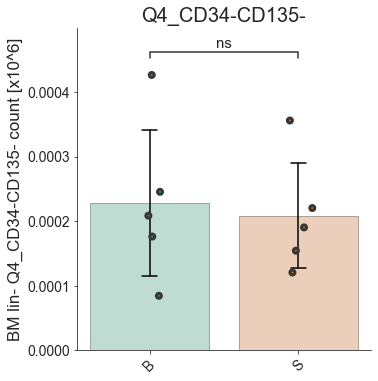

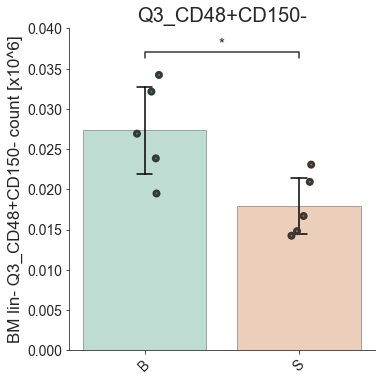

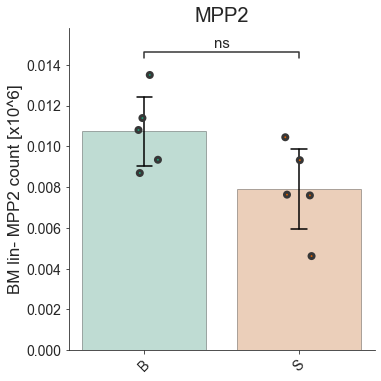

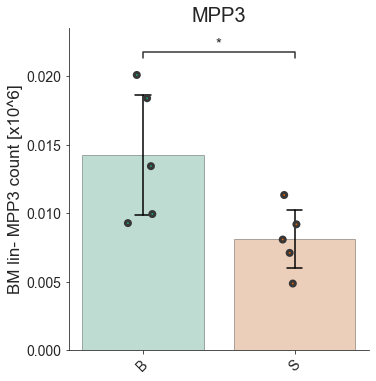

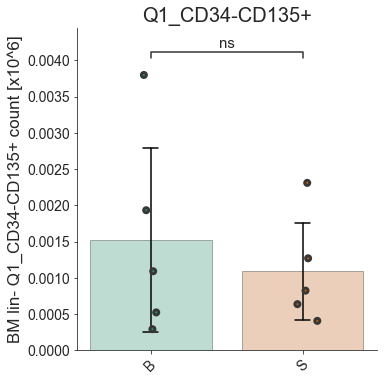

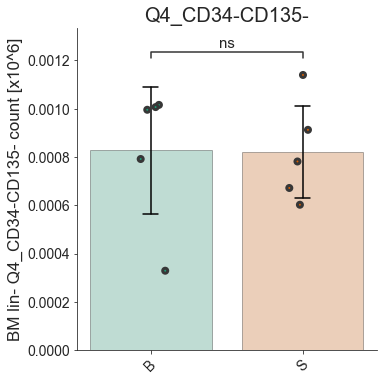

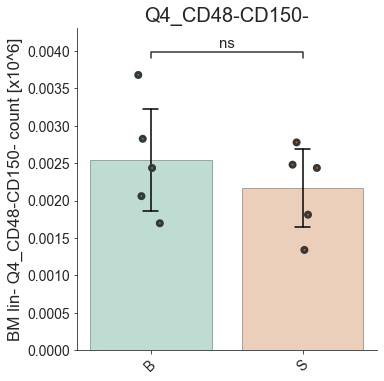

In [83]:
#Pre-Step 2: Set necessary settings for Seaborn
split = "/"
sns.set_style("ticks")
sns.set_palette("Dark2")

#Step 3: Visualize the data column by column using a for-loop
for column in count_table:
    if column != str("group"):
        ax = sns.catplot(kind="bar", 
                         data=count_table, 
                         y=column, 
                         x="group", 
                         ci="sd", 
                         edgecolor="black", 
                         errcolor="black", 
                         errwidth=1.5, 
                         capsize = 0.1, 
                         alpha=0.3, 
                         order = order)
        ax = sns.stripplot(x="group", 
                           y=column, 
                           data=count_table, 
                           dodge=True, 
                           alpha=1,
                           linewidth=3, 
                           order = order)
        plt.xlabel(None)
        plt.ylabel((organ + " " + column.split(split)[-1] + " count [x10^" + power + "]" ), fontsize = 17)
        plt.title(column.split(split)[-1], fontsize=20)
        plt.xticks(rotation=45)
        plt.tick_params(axis='both', which='major', labelsize=14)
        
        if stat_ind == "yes":   
            add_stat_annotation(ax, 
                                data=count_table, 
                                x="group", 
                                y=column, 
                                order=order,
                                box_pairs=tuple_comp,
                                test=stat_test, 
                                text_format='star', 
                                loc='inside', 
                                verbose=2, fontsize=15)
        
        plt.savefig(OUTPUT_DIR + "\\" + column.split(split)[-1] + "_absolute" + "." + datatype, dpi=size, bbox_inches="tight")